In [ ]:
import pandas as pd

joined_df = pd.read_csv("/content/joined_stock_news.csv")
joined_df

,date,Unnamed: 0,open,high,low,close,volume,source,author,title,...,neg_title,neu_title,pos_title,compound_title,neg_description,neu_description,pos_description,compound_description,ranking,views_millions
0,03-17,0.0,100.84,103.49,100.75,102.46,76140310.0,CNN,Michelle Toh,Baidu stock rebounds after falling sharply in ...,...,0.127,0.873,0.000,-0.1531,0.073,0.826,0.101,0.1531,1,400.3
1,03-17,0.0,100.84,103.49,100.75,102.46,76140310.0,CNN,Ángela Reyes Haczek,Las 5 cosas que debes saber este 17 de marzo: ...,...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,1,400.3
2,03-17,0.0,100.84,103.49,100.75,102.46,76140310.0,CNN,Melissa Velásquez Loaiza,Mercados asiáticos se recuperan después de que...,...,0.000,1.000,0.000,0.0000,0.000,0.943,0.057,0.2500,1,400.3
3,03-17,0.0,100.84,103.49,100.75,102.46,76140310.0,CNN,Laura He,Asian markets rebound after First Republic Ban...,...,0.000,0.797,0.203,0.4215,0.216,0.627,0.157,-0.4404,1,400.3
4,03-17,0.0,100.84,103.49,100.75,102.46,76140310.0,Fox News,Jeffrey Clark,Tech guru behind ChatGPT 'a little bit scared'...,...,0.127,0.772,0.101,-0.1335,0.194,0.761,0.044,-0.6929,2,291.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,03-04,0.0,0.00,0.00,0.00,0.00,0.0,Forbes,"Barry Collins, Contributor, \n Barry Collins, ...",ChatGPT: The Weirdest Things People Ask AI To ...,...,0.178,0.654,0.168,-0.0258,0.000,1.000,0.000,0.0000,11,67.9
751,03-04,0.0,0.00,0.00,0.00,0.00,0.0,Business Insider,hbullock@insider.com (Hallam Bullock),Matthew McConaughey's Salesforce gig,...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,13,56.9
752,03-04,0.0,0.00,0.00,0.00,0.00,0.0,Business Insider,bnguyen@insider.com (Britney Nguyen),ChatGPT isn't the only cool AI tool made by Op...,...,0.116,0.884,0.000,-0.2411,0.000,0.813,0.187,0.5574,13,56.9
753,03-04,0.0,0.00,0.00,0.00,0.00,0.0,Business Insider,stabahriti@insider.com (Sam Tabahriti),Elon Musk says AI is 'dangerous technology' an...,...,0.131,0.633,0.236,0.3612,0.080,0.920,0.000,-0.2280,13,56.9


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import cross_val_score 
from sklearn.compose import make_column_transformer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

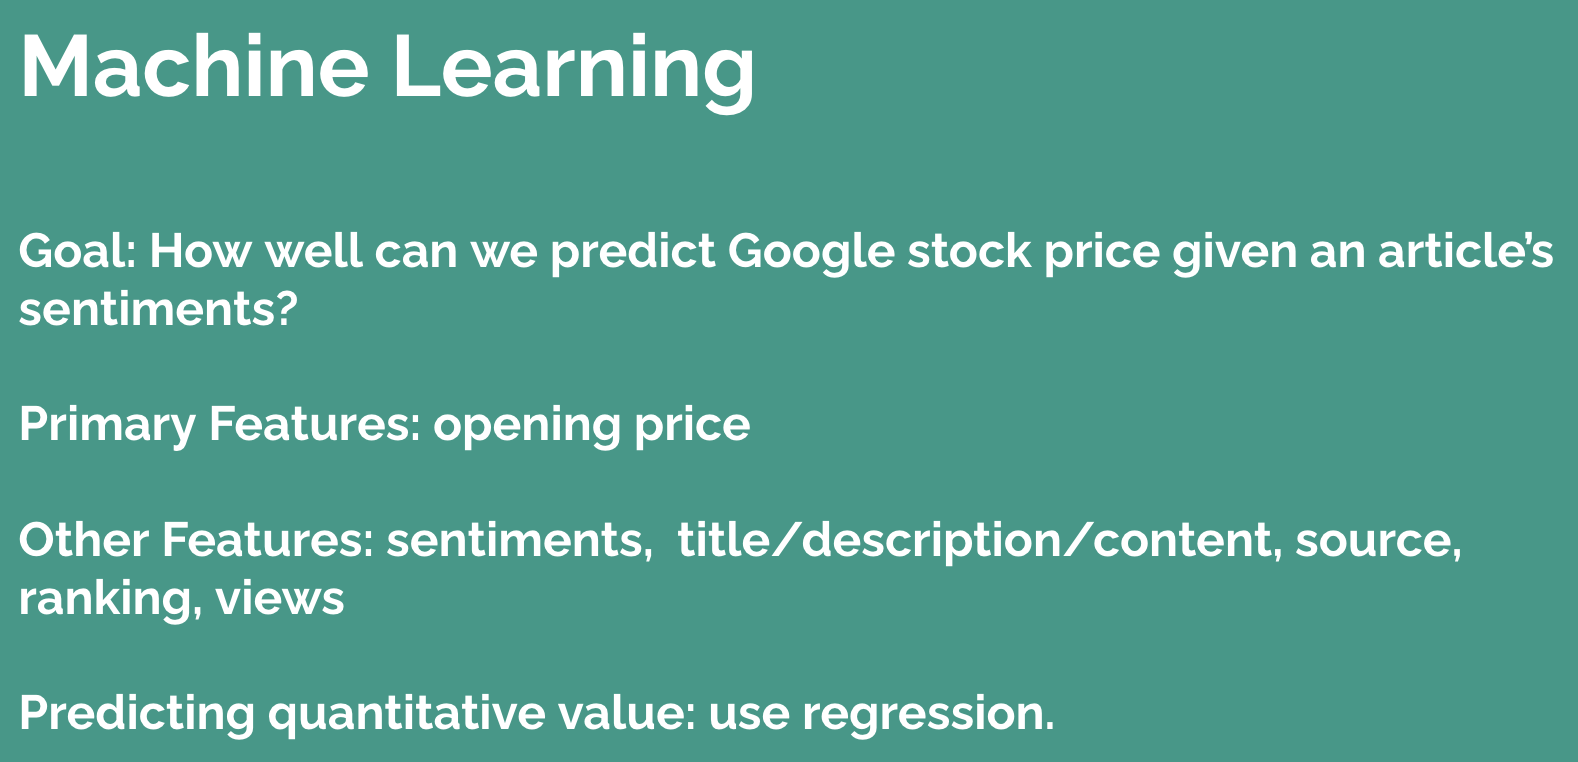

Implement RandomForestRegressor

In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["neg_title"]),
    (StandardScaler(), ["neu_title"]),
    (StandardScaler(), ["pos_title"]),
    (StandardScaler(), ["neg_description"]),
    (StandardScaler(), ["neu_description"]),
    (StandardScaler(), ["pos_description"]),
    (StandardScaler(), ["neg_content"]),
    (StandardScaler(), ["neu_content"]),
    (StandardScaler(), ["pos_content"]),
    (StandardScaler(), ["open"]),
    (MinMaxScaler(), ["views_millions"]),
    (TfidfVectorizer(max_features=100), "source"),

)
  
pipeline = make_pipeline(transformedCol, RandomForestRegressor())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

6.211722538705852


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["open"]),
    (MinMaxScaler(), ["views_millions"]),
    (TfidfVectorizer(max_features=100), "source"),

)
  
pipeline = make_pipeline(transformedCol, RandomForestRegressor())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

6.212251413178831


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["neg_title"]),
    (StandardScaler(), ["neu_title"]),
    (StandardScaler(), ["pos_title"]),
    (StandardScaler(), ["neg_description"]),
    (StandardScaler(), ["neu_description"]),
    (StandardScaler(), ["pos_description"]),
    (StandardScaler(), ["neg_content"]),
    (StandardScaler(), ["neu_content"]),
    (StandardScaler(), ["pos_content"]),
    (StandardScaler(), ["open"]),
    (MinMaxScaler(), ["views_millions"]),

)
  
pipeline = make_pipeline(transformedCol, RandomForestRegressor())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

6.204091778701295


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['source'], axis=1)
Y_train = joined_df['source']

# Initialize the Random Forest classifier with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["neg_title"]),
    (StandardScaler(), ["neu_title"]),
    (StandardScaler(), ["pos_title"]),
    (StandardScaler(), ["neg_description"]),
    (StandardScaler(), ["neu_description"]),
    (StandardScaler(), ["pos_description"]),
    (StandardScaler(), ["neg_content"]),
    (StandardScaler(), ["neu_content"]),
    (StandardScaler(), ["pos_content"]),
)
  
pipeline = make_pipeline(transformedCol, RandomForestClassifier())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score
print(cross_val_score(pipeline, X_train, Y_train, scoring="accuracy", cv=3).mean())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


0.14303632032715696


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (TfidfVectorizer(max_features=100), "title"),
    (StandardScaler(), ["open"])
)
  
pipeline = make_pipeline(transformedCol, RandomForestRegressor())

# Fit the model on the training data
model1 = pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

6.189395537825865


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (TfidfVectorizer(max_features=100), "content"),
    (TfidfVectorizer(max_features=100), "description"),
    (TfidfVectorizer(max_features=100), "title"),
    (StandardScaler(), ["open"])
)
  
pipeline = make_pipeline(transformedCol, RandomForestRegressor())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

6.180741583371662


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (TfidfVectorizer(max_features=100), "content"),
    (TfidfVectorizer(max_features=100), "description"),
    (TfidfVectorizer(max_features=100), "title"),
    (StandardScaler(), ["open"])
)
  
pipeline = make_pipeline(transformedCol, RandomForestRegressor())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

6.186593377355861


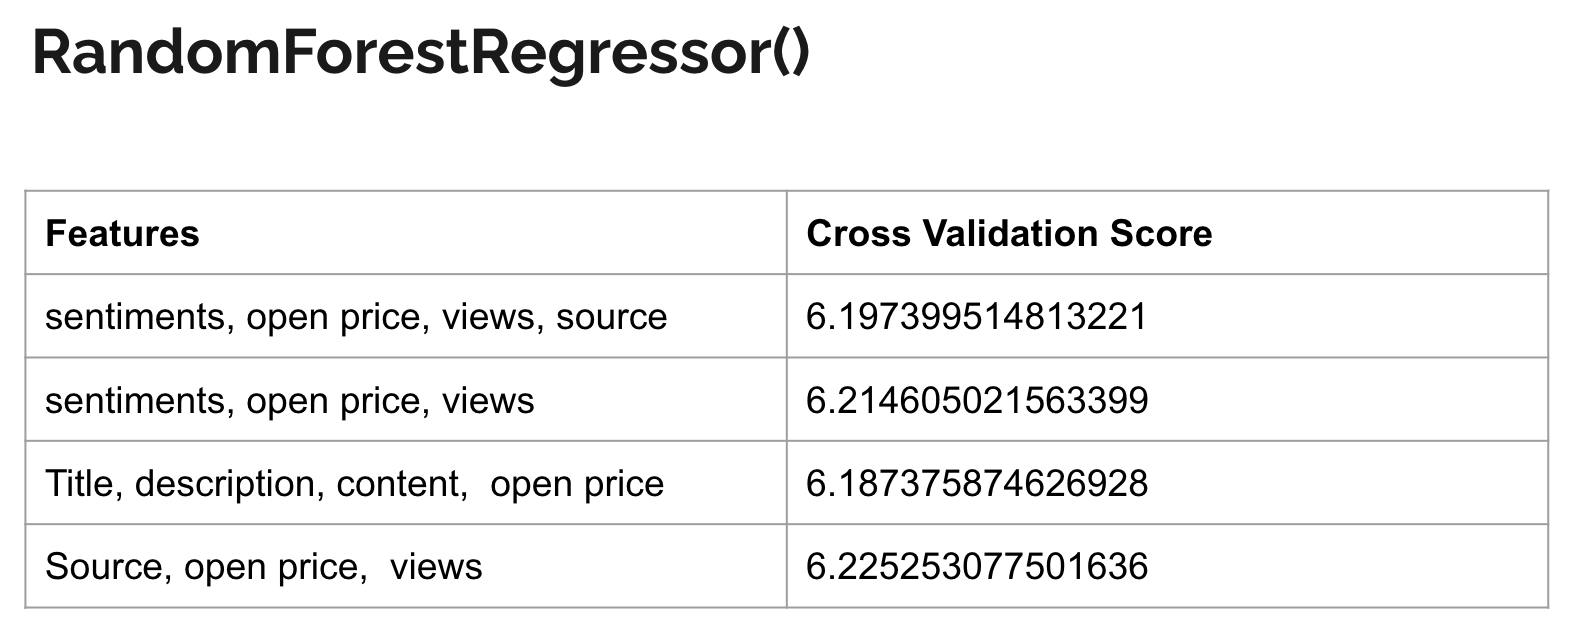

Implement Linear Regression

In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["neg_title"]),
    (StandardScaler(), ["neu_title"]),
    (StandardScaler(), ["pos_title"]),
    (StandardScaler(), ["neg_description"]),
    (StandardScaler(), ["neu_description"]),
    (StandardScaler(), ["pos_description"]),
    (StandardScaler(), ["neg_content"]),
    (StandardScaler(), ["neu_content"]),
    (StandardScaler(), ["pos_content"]),
    (StandardScaler(), ["open"]),
    (StandardScaler(), ["views_millions"]),
    (TfidfVectorizer(max_features=100), "source"),

)
  
pipeline = make_pipeline(transformedCol, LinearRegression())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

450.51437400127605


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["open"]),
    (MinMaxScaler(), ["views_millions"]),
    (TfidfVectorizer(max_features=100), "source"),

)
  
pipeline = make_pipeline(transformedCol, LinearRegression())

# Fit the model on the training data
model2 = pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

2.536966210534873


In [ ]:
# Split the data into features and target variables
X_train = joined_df.drop(['close'], axis=1)
Y_train = joined_df['close']

# Initialize the Random Forest regressor with default parameters
transformedCol = make_column_transformer(
    (StandardScaler(), ["neg_title"]),
    (StandardScaler(), ["neu_title"]),
    (StandardScaler(), ["pos_title"]),
    (StandardScaler(), ["neg_description"]),
    (StandardScaler(), ["neu_description"]),
    (StandardScaler(), ["pos_description"]),
    (StandardScaler(), ["neg_content"]),
    (StandardScaler(), ["neu_content"]),
    (StandardScaler(), ["pos_content"]),
    (StandardScaler(), ["open"]),
    (MinMaxScaler(), ["views_millions"]),

)
  
pipeline = make_pipeline(transformedCol, LinearRegression())

# Fit the model on the training data
pipeline.fit(X_train, Y_train)

#print the cross val score 
print(-1 * cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

433.2474648280323


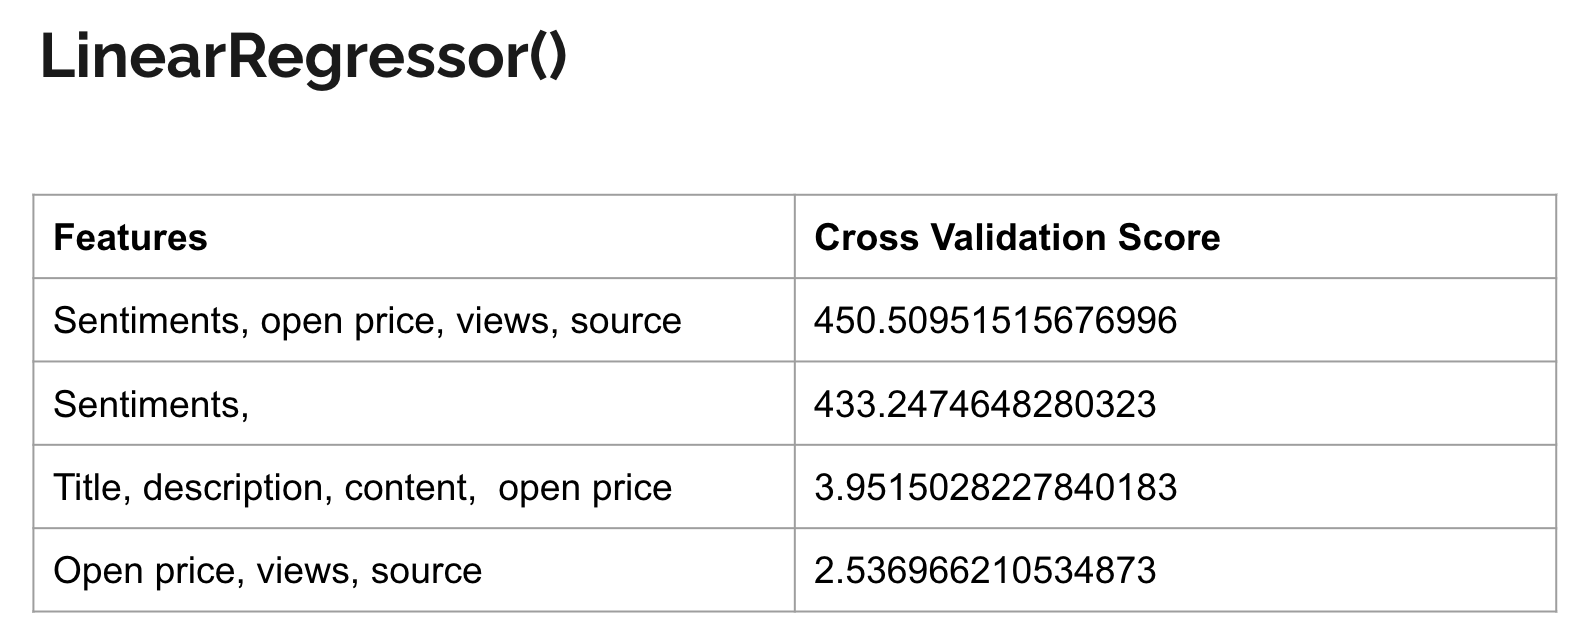

Implement Ensemble Methods

In [ ]:
#Ensemble models 

# Ensemble model using VotingRegressor
from sklearn.ensemble import VotingRegressor
voter = VotingRegressor([("Model 1", model1),
                        ("Model 2", model2)])

print(-cross_val_score(voter, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())


# Ensemble model using StackingRegressor
from sklearn.ensemble import StackingRegressor
stacker = StackingRegressor([("Model 1", model1),
                            ("Model 2", model2)],
                            final_estimator = LinearRegression())
print(-cross_val_score(stacker, X_train, Y_train, scoring="neg_mean_squared_error", cv=10).mean())

3.488607243949884
8.098359620466018
